#  Analysing and Improvising Guest Satisfaction Level in Hotel using Opinion Mining Techniques

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import time
from collections import Counter
import re, nltk
#from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import folium
from matplotlib.colors import LinearSegmentedColormap
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm

In [4]:
df=pd.read_csv("D:\\Hotel_Reviews.csv")

In [5]:
#printing the columns names of the datset
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [6]:
#printing the shape of the dataset
df.shape


(515738, 17)

In [7]:
print ('Number of data points : ', df.shape[0], \
       '\nNumber of features:', df.shape[1])
df.head()

Number of data points :  515738 
Number of features: 17


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [9]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [10]:
df.isna()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
515734,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
515735,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
515736,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [12]:
#Removing duplicates from the dataset
print(sum(df.duplicated()))
df = df.drop_duplicates()
print('After removing Duplicates: {}'.format(df.shape))

526
After removing Duplicates: (515212, 17)


#### observed that 526 reviews are duplicate and they were removed.

In [13]:
# taking a look at the null values
nulls = df[df.isnull().any(axis=1)]

nulls.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
99488,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,Australia,No Negative,0,377,Upgraded rooms are excellent Good size for tr...,25,6,10.0,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99489,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,United Kingdom,Noise Not being told about this when we check...,12,377,The location was great However renovations we...,45,1,6.7,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99490,20 Rue De La Ga t 14th arr 75014 Paris France,22,7/25/2017,7.8,Mercure Paris Gare Montparnasse,United States of America,Room was worn down One of the curtains did no...,43,377,Location was good,5,1,5.4,"[' Leisure trip ', ' Solo traveler ', ' Standa...",9 days,NaN,NaN
99491,20 Rue De La Ga t 14th arr 75014 Paris France,22,6/22/2017,7.8,Mercure Paris Gare Montparnasse,Australia,Access to shower was by the tub which is very...,54,377,No Positive,0,13,8.3,"[' Leisure trip ', ' Couple ', ' Standard Twin...",42 days,NaN,NaN
99492,20 Rue De La Ga t 14th arr 75014 Paris France,22,5/24/2017,7.8,Mercure Paris Gare Montparnasse,United States of America,The breakfast was way over priced and the sta...,83,377,The property was conveniently located near th...,11,2,5.8,"[' Leisure trip ', ' Couple ', ' Standard Room...",71 days,NaN,NaN


<Axes: >

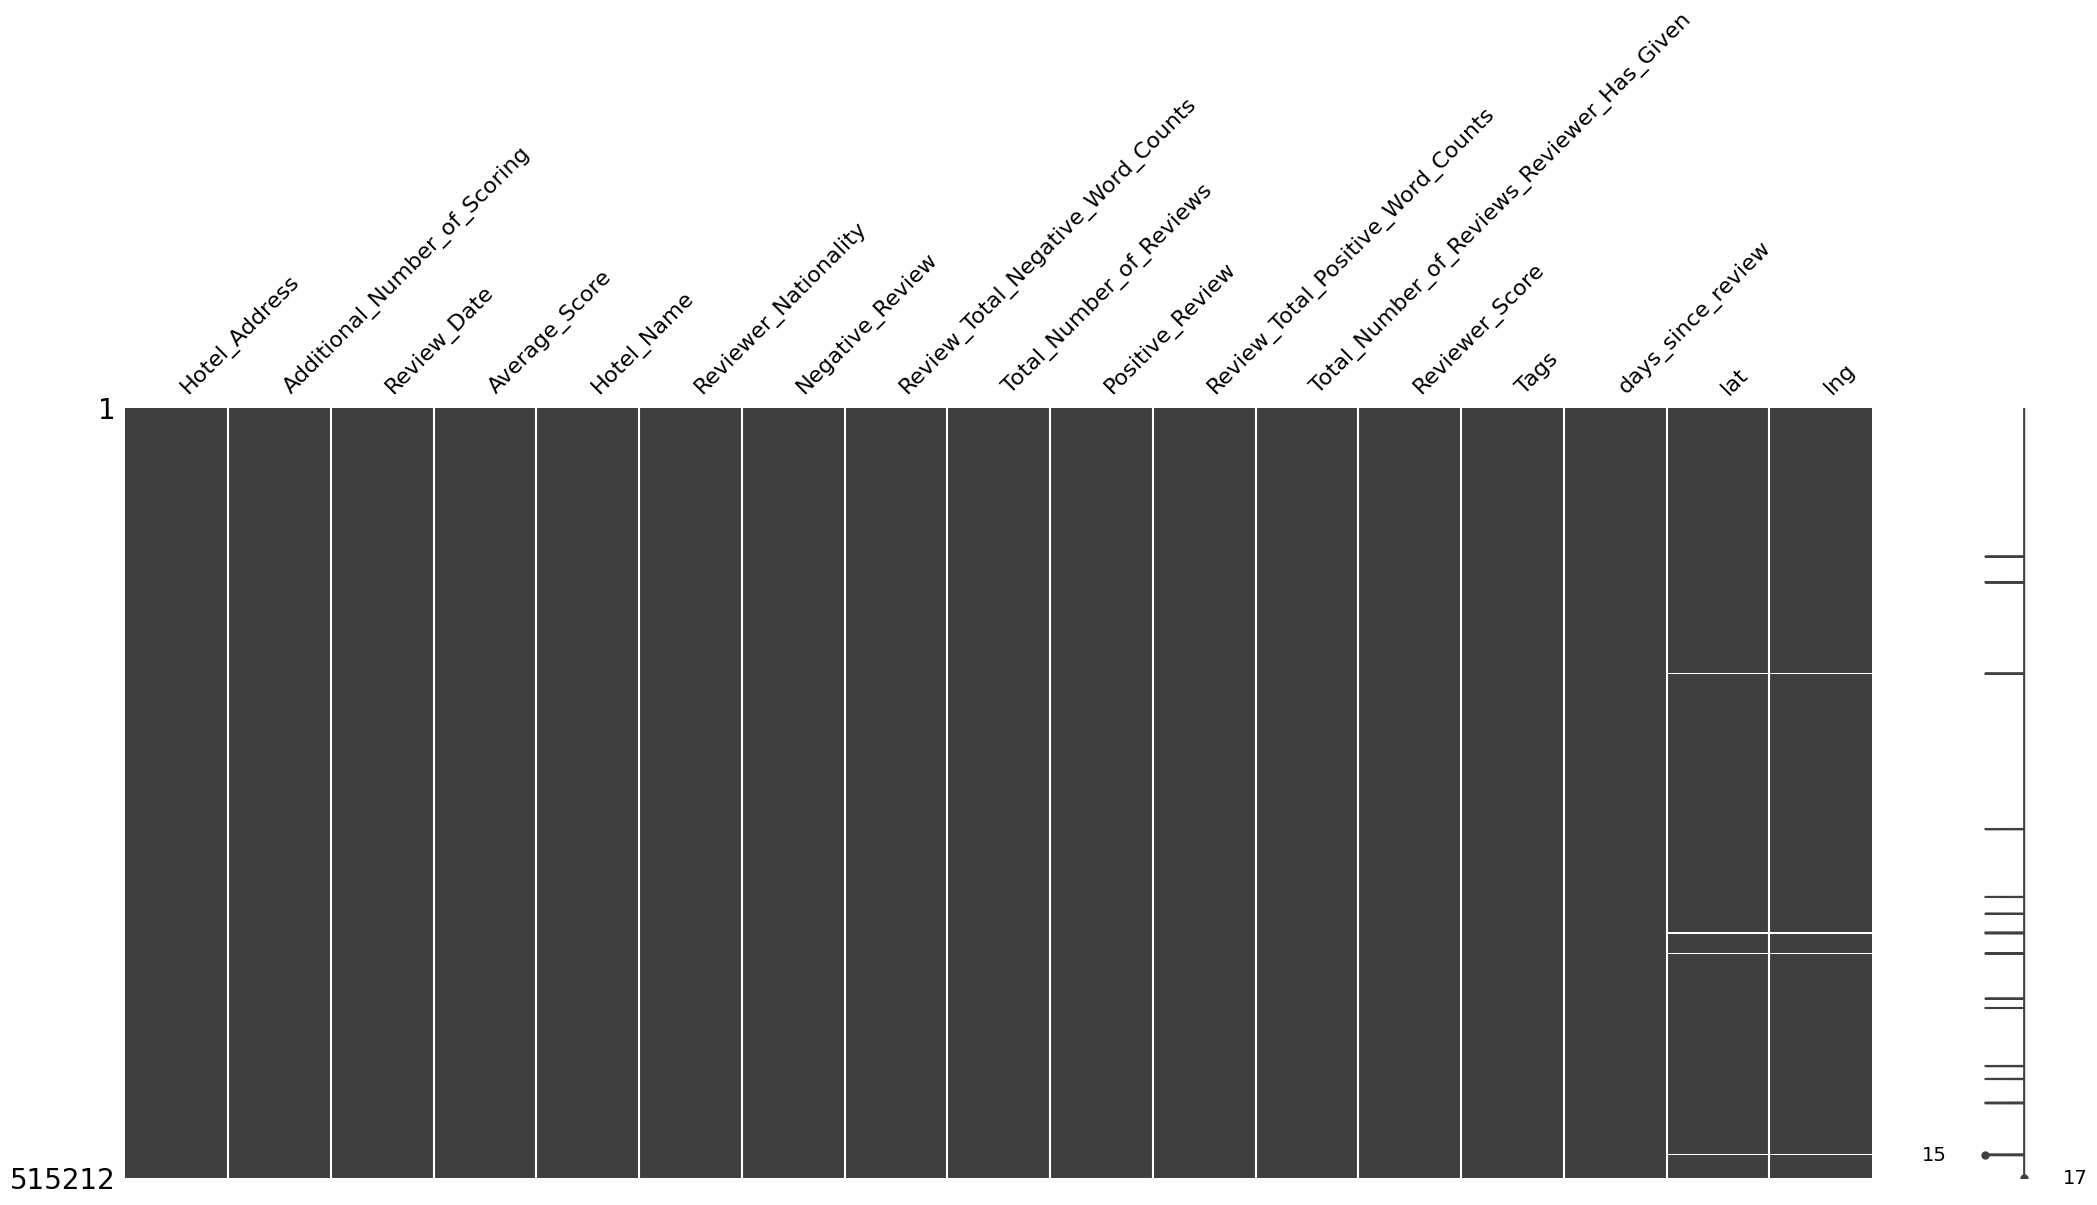

In [14]:
msno.matrix(df)

In [15]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans_df = nans(df)
nans_df = nans_df[['Hotel_Name','lat','lng']]
print('No of missing values in the dataset: {}'.format(len(nans_df)))

No of missing values in the dataset: 3268


In [16]:
nans_df.Hotel_Name.describe()

count                                    3268
unique                                     17
top       Fleming s Selection Hotel Wien City
freq                                      658
Name: Hotel_Name, dtype: object

#### We see that there are about 3268 Nan (missing values) from 17 Hotels lat,lng information is not available in the dataset.
i.e., 1.13% of Hotels lat,lng information is missing.

In [17]:
# let's look at the reviews frequency of the missing Hotels.
nans_df.Hotel_Name.value_counts()

Fleming s Selection Hotel Wien City                 658
Hotel City Central                                  563
Hotel Atlanta                                       389
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Daniel Vienna                                 245
Hotel Pension Baron am Schottentor                  223
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Derag Livinghotel Kaiser Franz Joseph Vienna        147
NH Collection Barcelona Podium                      146
City Hotel Deutschmeister                            93
Hotel Park Villa                                     61
Cordial Theaterhotel Wien                            57
Holiday Inn Paris Montmartre                         55
Roomz Vienna                                         49
Mercure Paris Gare Montparnasse                      37
Renaissance Barcelona Hotel                          33
Hotel Advance                                        28
Name: Hotel_Name, dtype: int64

In [18]:
print('No of reviews in the dataset to that Hotel:')
print('Fleming s Selection Hotel Wien City: {}'.format(len(df.loc[df.Hotel_Name == 'Fleming s Selection Hotel Wien City'])))
print('Hotel City Central: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel City Central'])))
print('Hotel Atlanta: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Atlanta'])))
print('Maison Albar Hotel Paris Op ra Diamond: {}'.format(len(df.loc[df.Hotel_Name == 'Maison Albar Hotel Paris Op ra Diamond'])))
print('Hotel Daniel Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Daniel Vienna'])))
print('Hotel Pension Baron am Schottentor: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Pension Baron am Schottentor'])))
print('Austria Trend Hotel Schloss Wilhelminenberg Wien: {}'.format(len(df.loc[df.Hotel_Name == 'Austria Trend Hotel Schloss Wilhelminenberg Wien'])))
print('Derag Livinghotel Kaiser Franz Joseph Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Derag Livinghotel Kaiser Franz Joseph Vienna'])))
print('NH Collection Barcelona Podium: {}'.format(len(df.loc[df.Hotel_Name == 'NH Collection Barcelona Podium'])))
print('City Hotel Deutschmeister: {}'.format(len(df.loc[df.Hotel_Name == 'City Hotel Deutschmeister'])))
print('Hotel Park Villa: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Park Villa'])))
print('Cordial Theaterhotel Wien: {}'.format(len(df.loc[df.Hotel_Name == 'Cordial Theaterhotel Wien'])))
print('Holiday Inn Paris Montmartre: {}'.format(len(df.loc[df.Hotel_Name == 'Holiday Inn Paris Montmartre'])))
print('Roomz Vienna: {}'.format(len(df.loc[df.Hotel_Name == 'Roomz Vienna'])))
print('Mercure Paris Gare Montparnasse: {}'.format(len(df.loc[df.Hotel_Name == 'Mercure Paris Gare Montparnasse'])))
print('Renaissance Barcelona Hotel: {}'.format(len(df.loc[df.Hotel_Name == 'Renaissance Barcelona Hotel'])))
print('Hotel Advance: {}'.format(len(df.loc[df.Hotel_Name == 'Hotel Advance'])))

No of reviews in the dataset to that Hotel:
Fleming s Selection Hotel Wien City: 658
Hotel City Central: 563
Hotel Atlanta: 389
Maison Albar Hotel Paris Op ra Diamond: 290
Hotel Daniel Vienna: 245
Hotel Pension Baron am Schottentor: 223
Austria Trend Hotel Schloss Wilhelminenberg Wien: 194
Derag Livinghotel Kaiser Franz Joseph Vienna: 147
NH Collection Barcelona Podium: 146
City Hotel Deutschmeister: 93
Hotel Park Villa: 61
Cordial Theaterhotel Wien: 57
Holiday Inn Paris Montmartre: 55
Roomz Vienna: 49
Mercure Paris Gare Montparnasse: 37
Renaissance Barcelona Hotel: 33
Hotel Advance: 28


#### From the above figures we see that the missing values and available values in the dataset are same.(i.e the inflat,lng values are not available in the entire dataset).
#### So, Now we can fill the NaN values in the dataset manually. (Simply we can ignore those rows in the dataset by removing them. But i decided not to delete the information and fill the lat,lng values manually just because when it comes to Business problem if i try to remove the data i am losing information of 17 Hotel's. It seems like losing our 17 clients.)

In [19]:
#latitude information of Hotels
loc_lat = {'Fleming s Selection Hotel Wien City':48.209270,
       'Hotel City Central':48.2136,
       'Hotel Atlanta':48.210033,
       'Maison Albar Hotel Paris Op ra Diamond':48.875343,
       'Hotel Daniel Vienna':48.1888,
       'Hotel Pension Baron am Schottentor':48.216701,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':48.2195,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':48.245998,
      'NH Collection Barcelona Podium':41.3916,
      'City Hotel Deutschmeister':48.22088,
      'Hotel Park Villa':48.233577,
      'Cordial Theaterhotel Wien':48.209488,
      'Holiday Inn Paris Montmartre':48.888920,
      'Roomz Vienna':48.186605,
      'Mercure Paris Gare Montparnasse':48.840012,
      'Renaissance Barcelona Hotel':41.392673,
      'Hotel Advance':41.383308}

In [20]:
#longitude information of Hotels
loc_lng ={'Fleming s Selection Hotel Wien City':16.353479,
       'Hotel City Central':16.3799,
       'Hotel Atlanta':16.363449,
       'Maison Albar Hotel Paris Op ra Diamond':2.323358,
       'Hotel Daniel Vienna':16.3840,
       'Hotel Pension Baron am Schottentor':16.359819,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':16.2856,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':16.341080,
      'NH Collection Barcelona Podium':2.1779,
      'City Hotel Deutschmeister':16.36663,
      'Hotel Park Villa':16.345682,
      'Cordial Theaterhotel Wien':16.351585,
      'Holiday Inn Paris Montmartre':2.333087,
      'Roomz Vienna':16.420643,
      'Mercure Paris Gare Montparnasse':2.323595,
      'Renaissance Barcelona Hotel':2.167494,
      'Hotel Advance':2.162828}

In [21]:
#filling the latitude information
df['lat'] = df['lat'].fillna(df['Hotel_Name'].apply(lambda x: loc_lat.get(x)))
#filling longitude information
df['lng'] = df['lng'].fillna(df['Hotel_Name'].apply(lambda x: loc_lng.get(x)))

<Axes: >

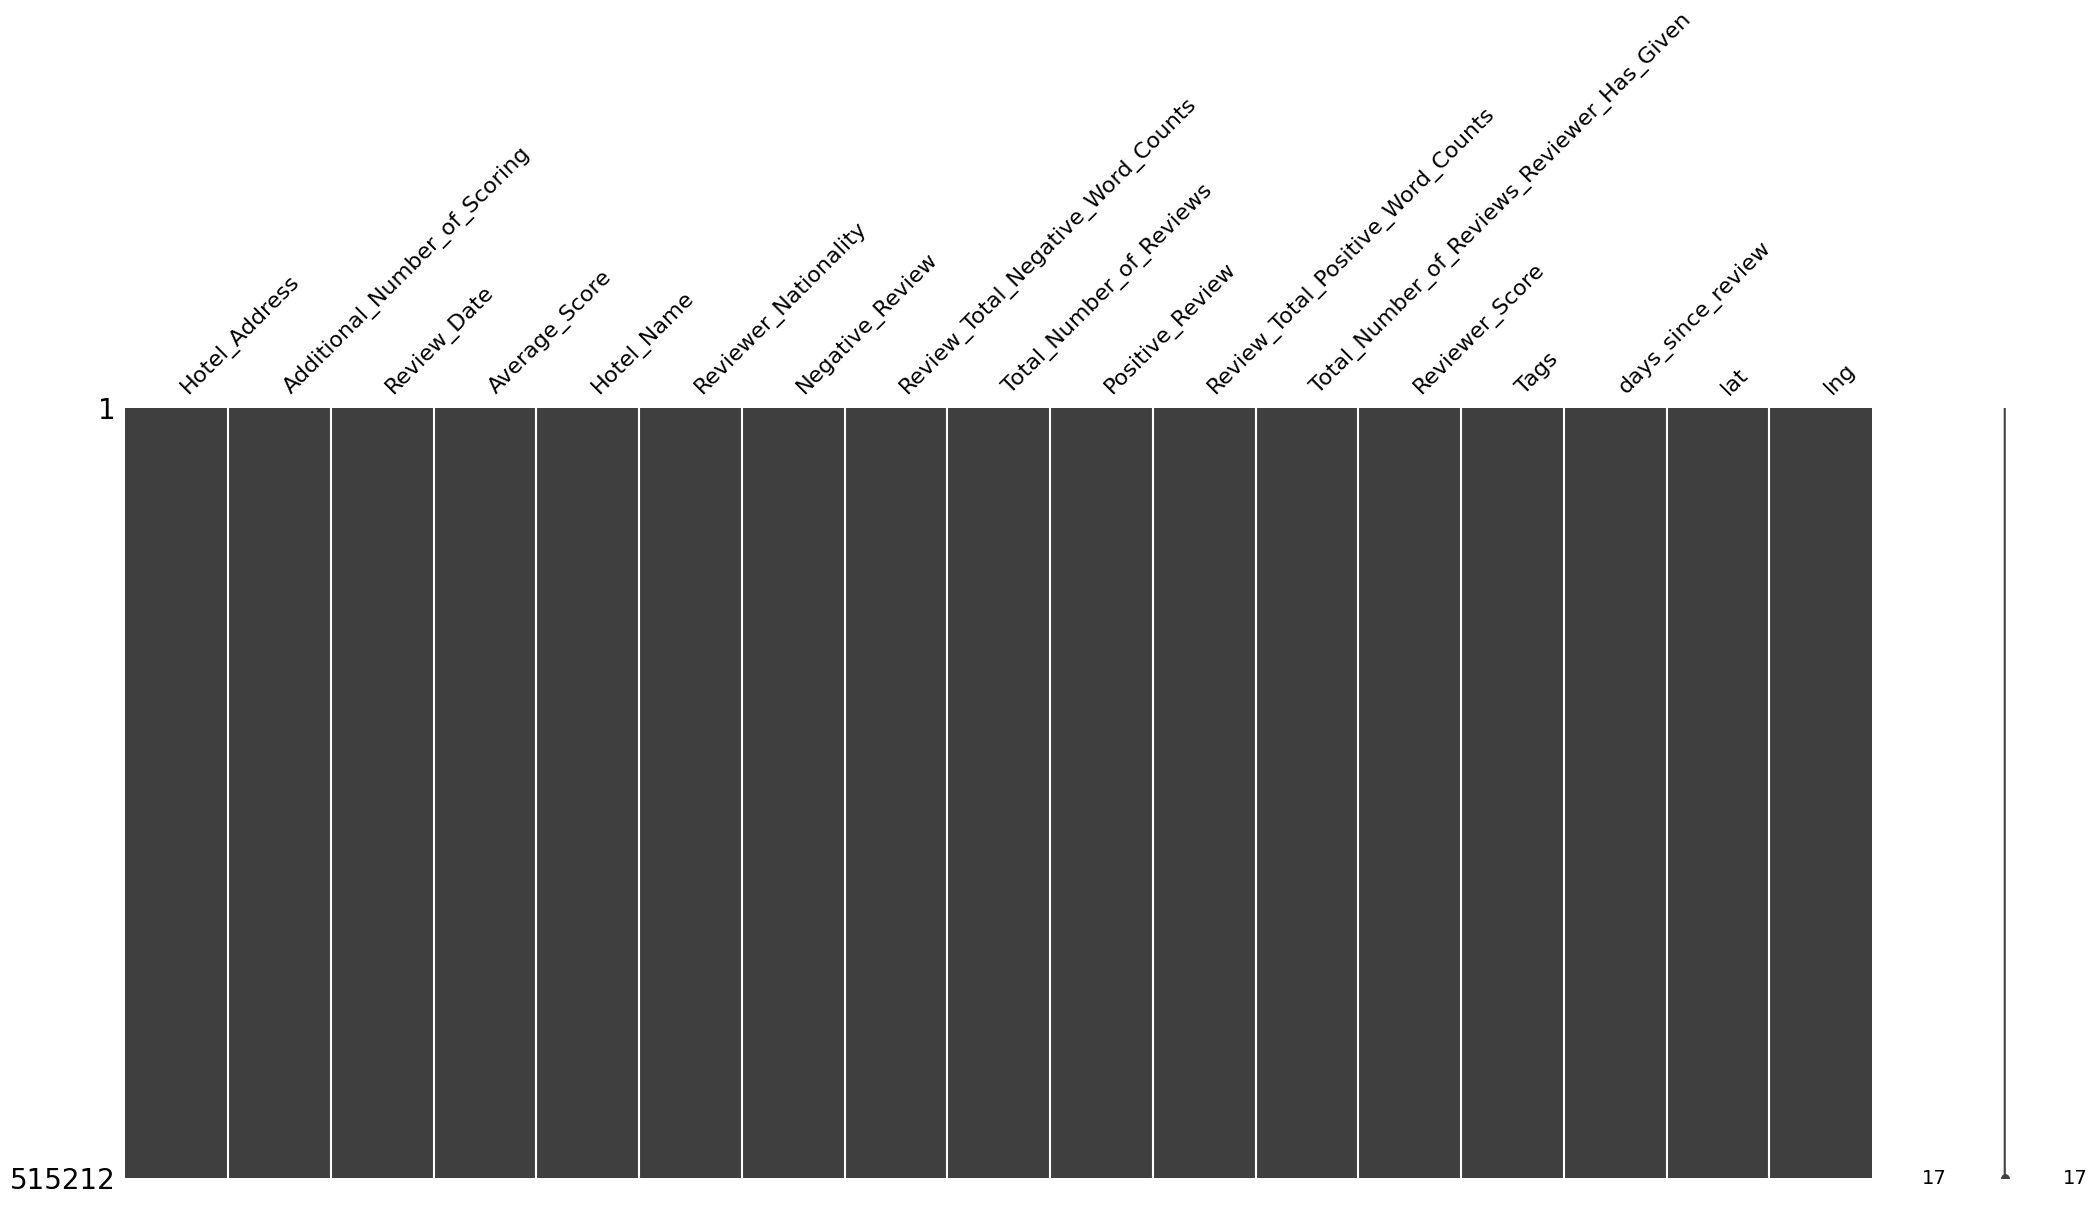

In [22]:
#looking whether information is correctly filled or not.
msno.matrix(df)

In [23]:
#saving the data to pickle files
df.to_pickle('After_filling_Nans')

In [24]:
#loading the data from the pickle file
df = pd.read_pickle('After_filling_Nans')

#### Basic stats for the feature: Hotel_Name

In [25]:
df.Hotel_Name.describe()

count                                         515212
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

<Axes: >

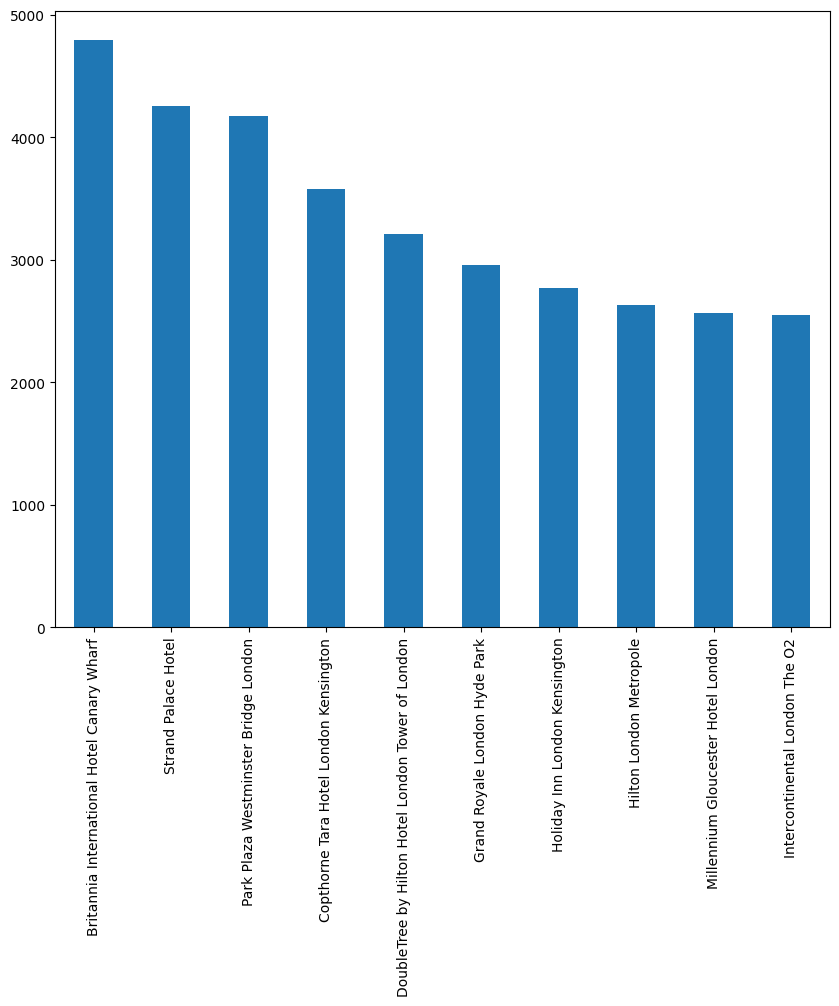

In [26]:
# Let's look at the top 10 reviewed Hotels
Hotel_Name_count = df.Hotel_Name.value_counts()
Hotel_Name_count[:10].plot(kind='bar',figsize=(10,8))

#### Basic stats for the feature: Average_Score

In [27]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 50, 18
rcParams["axes.labelsize"] = 16
from matplotlib import pyplot
import seaborn as sns

<Axes: xlabel='Average_Score', ylabel='count'>

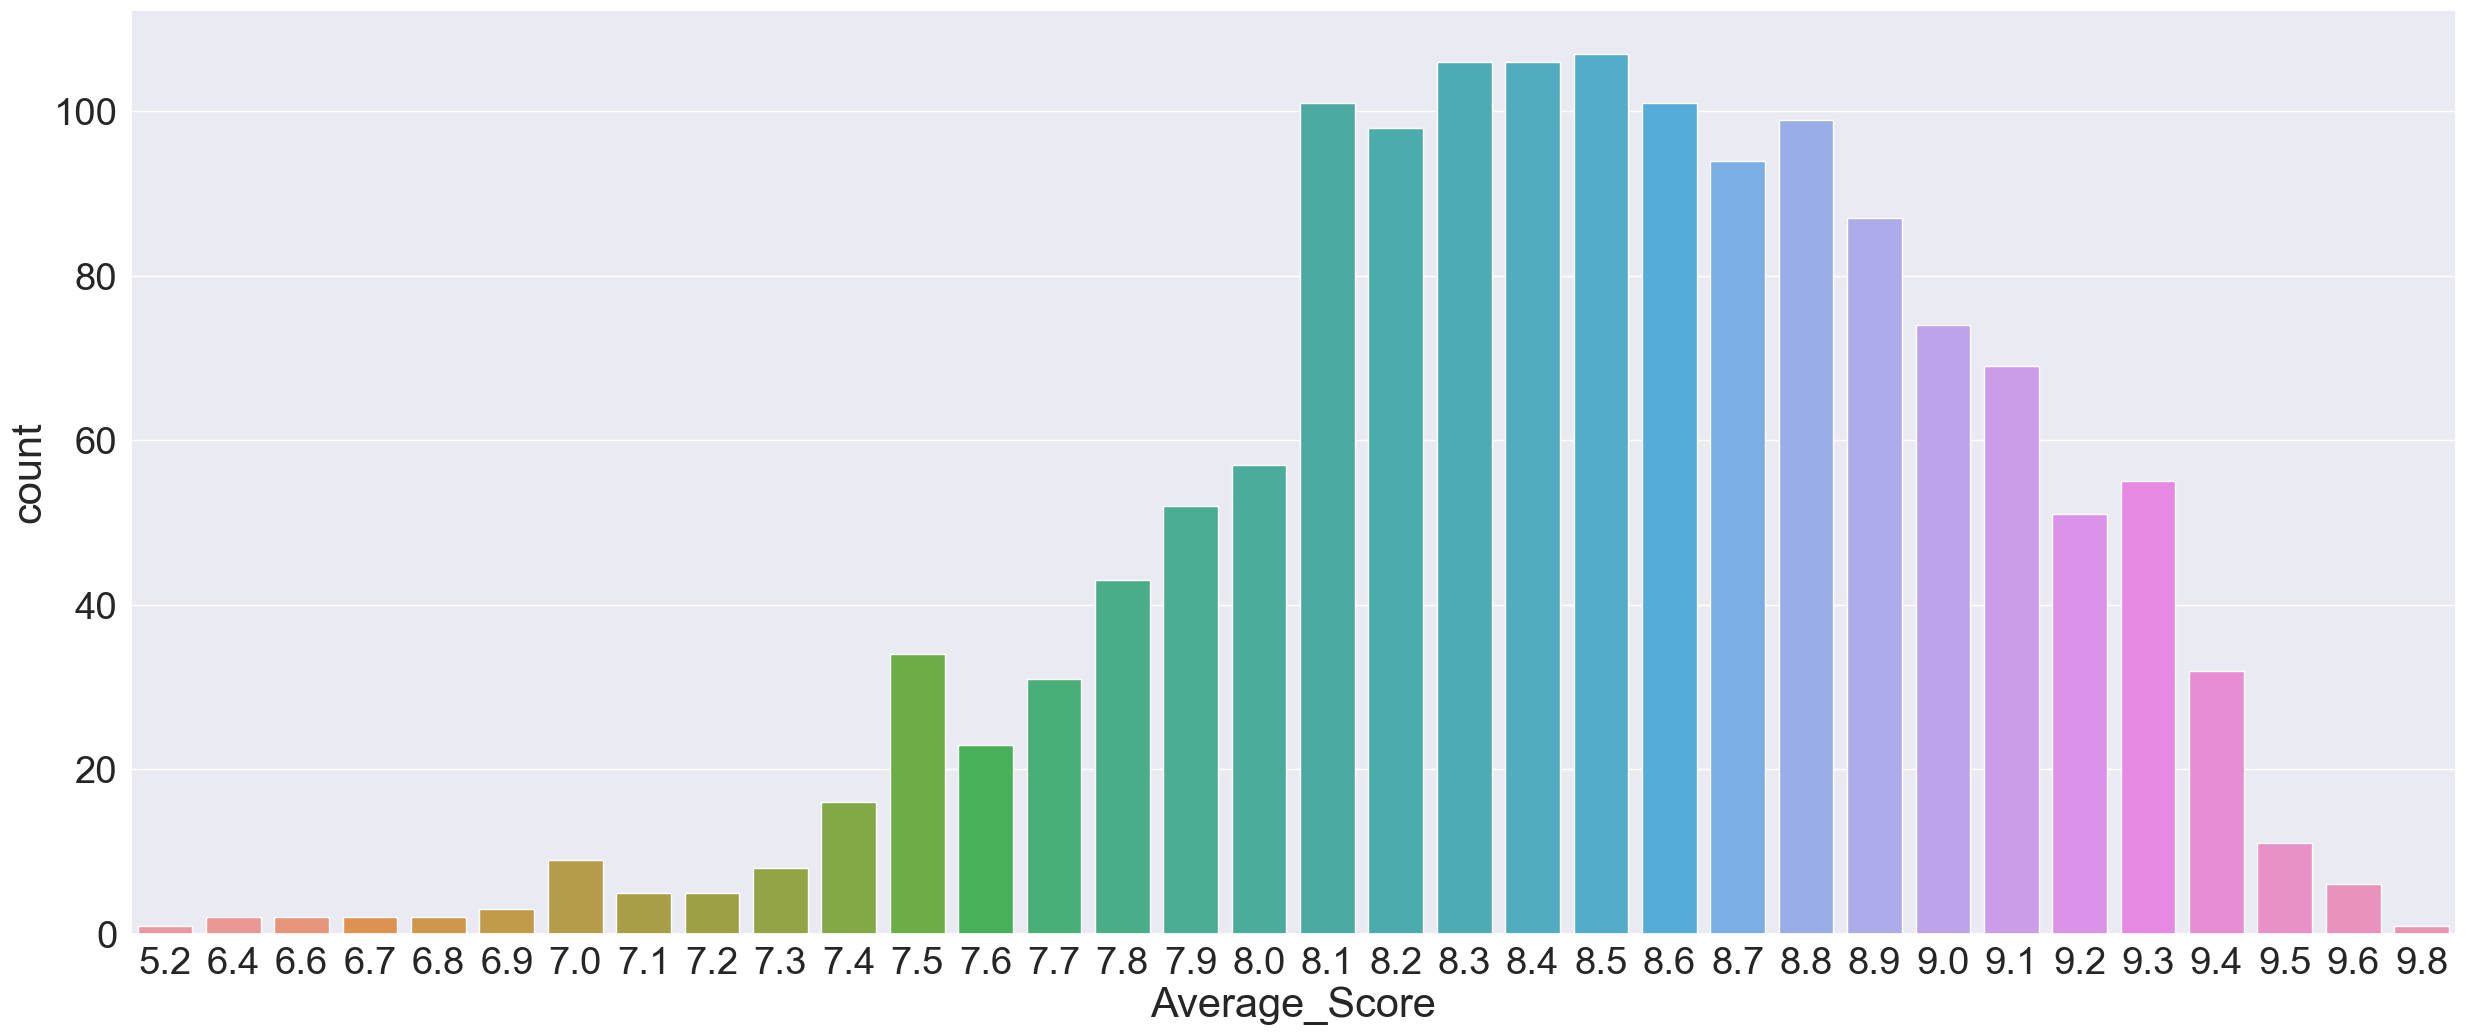

In [28]:
data_plot = df[["Hotel_Name","Average_Score"]].drop_duplicates()
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = "Average_Score",data=data_plot)

#### *we see that most of the Hotels average_score lie in the range of 8.0 and 9.1 range *

#### Basic stats for the feature: Review_Nationality

In [ ]:
text = ""
for i in range(df.shape[0]):
    text = " ".join([text,df["Reviewer_Nationality"].values[i]])

In [ ]:
df.Reviewer_Nationality.describe()

In [ ]:
# Let's look at the Top 10 Reviewer's Nationalities
Reviewer_Nat_Count = df.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:10])

The Reviewers belongs to 227 different countries and almost 47.57%(245110/515212) of Reviewers are from United Kingdom

#### Basic stats for the feature: Review_Date

In [ ]:
df.Review_Date.describe()

In [ ]:
# Let's look at the top 10 Reviews given dates
Review_Date_count = df.Review_Date.value_counts()
Review_Date_count[:10].plot(kind='bar')

#### Basic stats for the feature: Total_Number_of_Reviews_Reviewer_Has_Given ¶

In [ ]:
Reviewers_freq = df.Total_Number_of_Reviews_Reviewer_Has_Given.value_counts()
Reviewers_freq[:10].plot(kind='bar')

In [ ]:
Reviewers_freq[:10]

We see that almost 29.99% (154506 / 515212) of user's reviewed for the first_time.

#### map visualitation inorder to see where the Hotels are located using lat,lng information.

In [ ]:
#Loading the unique Hotel's information to plot them on the map
temp_df = df.drop_duplicates(['Hotel_Name'])
len(temp_df)

In [ ]:
map_osm = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )

temp_df.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(map_osm), axis=1)

map_osm

Observations:

From the map we can see all the 1492 Hotels are located in 6 cities (Bercelona, Paris, Milan, Vienna, London, Amsterdam

#### Basic stats for the feature: Review_Total_Positive_Word_Counts 

In [36]:
pos_words = df.Review_Total_Positive_Word_Counts.value_counts()
pos_words[:10]

0     35904
6     26887
5     26809
4     24624
7     24517
8     23219
3     22505
9     21188
2     20905
10    19597
Name: Review_Total_Positive_Word_Counts, dtype: int64

#### we see that 0 words are more in number it means they are completely Negative reviews. Lets have a look at them

In [37]:
a = df.loc[df.Review_Total_Positive_Word_Counts == 0]
print('No of completely Negative reviews in the dataset:',len(a))
b = a[['Positive_Review','Negative_Review']]
b[:10]

No of completely Negative reviews in the dataset: 35904


,Positive_Review,Negative_Review
8,No Positive,Even though the pictures show very clean room...
32,No Positive,Our bathroom had an urine order Shower was ve...
98,No Positive,Got charged 50 for a birthday package when it...
121,No Positive,The first room had steep steps to a loft bed ...
134,No Positive,Foyer was a mess Only place to relax was the ...
146,No Positive,We booked a 3 night stay in a suite On arriva...
169,No Positive,Nothing One Of The Receptionist she did a rac...
172,No Positive,Hotel under sonstruction which we weren t awa...
202,No Positive,Renovation around the hotel sometimes can sta...
209,No Positive,Not given the room type we had booked and pre...


#### By looking those reviews we can conclude that they are completely Negative reviews.

#### Basic stats for the feature: Review_Total_Negative_Word_Counts ¶

In [38]:
neg_words = df.Review_Total_Negative_Word_Counts.value_counts()
neg_words[:10]

0     127757
2      24631
3      18126
6      17726
5      16788
7      16123
4      15049
8      14709
9      13623
10     12409
Name: Review_Total_Negative_Word_Counts, dtype: int64

we see that 0 words are more in number it means they are completely Positive reviews. Lets have a look at them.

In [39]:
a = df.loc[df.Review_Total_Negative_Word_Counts == 0 ]
print('No of completely positive reviews in the dataset:',len(a))
b = a[['Positive_Review','Negative_Review']]
b[:10]

No of completely positive reviews in the dataset: 127757


,Positive_Review,Negative_Review
1,No real complaints the hotel was great great ...,No Negative
13,This hotel is being renovated with great care...,No Negative
15,This hotel is awesome I took it sincirely bec...,No Negative
18,Public areas are lovely and the room was nice...,No Negative
48,The quality of the hotel was brilliant and ev...,No Negative
53,Beautiful setting in a lovely park room very ...,No Negative
55,The hotel is lovely and the staff were amazin...,No Negative
59,Basically everything The style of the hotel i...,No Negative
75,The whole hotel was very clean the staff were...,No Negative
78,Hotel was really nice staff were very friendl...,No Negative


Observations:
By using Review_Total_Negative_Word_Counts and Review_Total_Positive_Word_Counts attributes we can classify 1,63,661 reviews only. (i.e.,31.76% of the total reviews). so these attributes can't be used for classifying the reviews.
i also found that with the word_count- 2 ' everything', ' Everything', ' nothing', ' Nothing' words are present in both Positive_Review and Negative_Review. ( Those words are preceded by white spaces in the begning' that's why their words count is 2
By including ' everything', ' Everything', ' nothing', ' Nothing' words we can classify more reviews

#### Calculating no of positve and negative reviews¶

In [40]:
# For classifying positive and negative reviews
df['pos_count']=0
df['neg_count']=0

In [41]:
# since we found the words are in mixed case letters and with trailing whitespace 
#we remove those white spaces and converting the reviews to lowercases
df['Negative_Review']=[x.lower().strip() for x in df['Negative_Review']]
df['Positive_Review']=[x.lower().strip() for x in df['Positive_Review']]

In [42]:
#if the Positive_Review contains the words 'no positive' and 'nothing' are considered as a Negative_Review.
# if the Negative_Review contains the word 'everything' it is also considered as Negative_Review.
# we are maiking those reveiews as 1 in neg_count(attribute).
df["neg_count"] = df.apply(lambda x: 1 if x["Positive_Review"] == 'no positive' or \
                           x['Positive_Review']=='nothing' or \
                           x['Negative_Review']=='everything' \
                           else x['pos_count'],axis = 1)

In [43]:
#if the Negative_Review contains the words 'no negative' and 'nothing' are considered as a Positive_Review.
#if the Positive_Review contains the word 'Everything' it is also considered as positive_Review. 
#we are making those reviews as 1 in the pos_count(attribute). 
df["pos_count"] = df.apply(lambda x: 1 if x["Negative_Review"] == 'no negative' or \
                           x['Negative_Review']=='nothing' or \
                           x['Positive_Review']=='everything' \
                           else x['pos_count'],axis = 1)

In [44]:
#seeing how many reviews are classified as positive one's
df.pos_count.value_counts()

0    365231
1    149981
Name: pos_count, dtype: int64

In [45]:
#seeing how many reviews are classified as negative one's
df.neg_count.value_counts()

0    477358
1     37854
Name: neg_count, dtype: int64

By adding those words we classified (1,49,981 + 37,854) i.e., 1,87,835 reviews.

In [46]:
# Calculating no of positive and negative reviews for each Hotel and storing them into reviews dataset. 
reviews = pd.DataFrame(df.groupby(["Hotel_Name"])["pos_count","neg_count"].sum())

C:\Users\KISHOR~1\AppData\Local\Temp/ipykernel_14272/754138699.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reviews = pd.DataFrame(df.groupby(["Hotel_Name"])["pos_count","neg_count"].sum())


In [47]:
reviews.head()

,pos_count,neg_count
Hotel_Name,,
11 Cadogan Gardens,55,10
1K Hotel,26,12
25hours Hotel beim MuseumsQuartier,264,30
41,57,0
45 Park Lane Dorchester Collection,19,0


In [48]:
# Adding index to the reviews dataframe
reviews["HoteL_Name"] = reviews.index
reviews.index = range(reviews.shape[0])
reviews.head()

,pos_count,neg_count,HoteL_Name
0,55,10,11 Cadogan Gardens
1,26,12,1K Hotel
2,264,30,25hours Hotel beim MuseumsQuartier
3,57,0,41
4,19,0,45 Park Lane Dorchester Collection


In [49]:
#calculating total number of reviews for each hotel
reviews["total"] = reviews["pos_count"] + reviews["neg_count"]
#calculating the positive ratio for each Hotel.
reviews["pos_ratio"] = reviews["pos_count"].astype("float")/reviews["total"].astype("float")

Finding the top 20 famous Hotels

In [50]:
#looking at the famous 20 hotels location in the map. Famous Hotels are calculated based on the total
#no of reviews the Hotel has.
famous_hotels = reviews.sort_values(by = "total",ascending=False).head(100)
pd.set_option('display.max_colwidth', 2000)
popular = famous_hotels["HoteL_Name"].values[:20]
popular_hotels =df.loc[df['Hotel_Name'].isin(popular)][["Hotel_Name",\
                                "Hotel_Address",'Average_Score','lat','lng']].drop_duplicates()
maps_osm = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )
popular_hotels.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(maps_osm), axis=1)

maps_osm

In [51]:
#look at the Hotel_Name and Hotel_Address of those Hotels
popular_hotels

,Hotel_Name,Hotel_Address,Average_Score,lat,lng
5257,Park Plaza County Hall London,1 Addington Street Lambeth London SE1 7RY United Kingdom,8.4,51.501400,-0.116009
8301,Grand Royale London Hyde Park,1 Inverness Terrace Westminster Borough London W2 3JP United Kingdom,7.7,51.510995,-0.186342
14829,Intercontinental London The O2,1 Waterview Drive Greenwich London SE10 0TW United Kingdom,9.4,51.502435,-0.000250
57597,M by Montcalm Shoreditch London Tech City,151 157 City Road Shoreditch Islington London EC1V 1JS United Kingdom,9.1,51.527847,-0.088947
63942,Britannia International Hotel Canary Wharf,163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom,7.1,51.501910,-0.023221
74223,Park Plaza London Riverbank,18 Albert Embankment Lambeth London SE1 7TJ United Kingdom,8.3,51.491374,-0.121419
111930,Hilton London Metropole,225 Edgware Road Westminster Borough London W2 1JU United Kingdom,7.5,51.519569,-0.170521
124658,DoubleTree by Hilton London Docklands Riverside,265 Rotherhithe Street Southwark London SE16 5HW United Kingdom,8.1,51.504348,-0.033444
127024,Park Grand Paddington Court,27 Devonshire Terrace Westminster Borough London W2 3DP United Kingdom,8.1,51.513556,-0.180002
140872,Blakemore Hyde Park,30 Leinster Gardens Bayswater Westminster Borough London W2 3AN United Kingdom,8.5,51.512974,-0.183743


Observations:
Among the famous 20 Hotel's 19 Hotels are located in London and one more is located in Amsterdam

#### Finding the top 20 positive rated Hotels

In [52]:
#Looking at top 20 famous hotels with positive reviews.
pos = famous_hotels.sort_values(by = "pos_ratio",ascending=False)["HoteL_Name"].head(20).values
famous_pos = df.loc[df['Hotel_Name'].isin(pos)][["Hotel_Name","Hotel_Address",'lat','lng','Average_Score']].drop_duplicates()
positive_map = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )
famous_pos.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(positive_map), axis=1)

positive_map

In [53]:
#look at the Hotel_Name and Hotel_Address of those Hotels
famous_pos

,Hotel_Name,Hotel_Address,lat,lng,Average_Score
971,Apex Temple Court Hotel,1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom,51.513734,-0.108751,9.2
44652,The Chamberlain,130 135 Minories City of London London EC3N 1NU United Kingdom,51.512246,-0.075733,8.9
85479,Hilton London Bankside,2 8 Great Suffolk Street Southwark London SE1 0UG United Kingdom,51.505696,-0.101525,9.3
96177,citizenM London Bankside,20 Lavington Street Southwark London SE1 0NZ United Kingdom,51.505151,-0.100472,9.1
100530,Mondrian London,20 Upper Ground Southwark London SE1 9PD United Kingdom,51.508404,-0.106799,9.1
147504,Shangri La Hotel at The Shard London,31 St Thomas Street Southwark London SE1 9QU United Kingdom,51.504497,-0.085556,9.4
180550,citizenM Tower of London,40 trinity square City of London London EC3N 4DJ United Kingdom,51.510237,-0.076443,9.1
223782,Club Quarters Hotel Lincoln s Inn Fields,61 Lincoln s Inn Fields Camden London WC2A 3JW United Kingdom,51.516099,-0.118175,8.9
228012,The Piccadilly London West End,65 73 Shaftesbury Avenue Westminster Borough London W1D 6EX United Kingdom,51.512196,-0.131838,9.0
273892,Urban Lodge Hotel,Arlandaweg 10 Westpoort 1043 EW Amsterdam Netherlands,52.385649,4.834443,8.6


Observation:
Among the top 20 Hotels with positive reviews 11 Hotels are located in London, 4 in Netherlands, 2 in Milan, 2 in Spain and 1 in Vienna
Most of the famous positive reviewed hotels ratings are between 8.6 to 9.3.

In [54]:
#saving the dataframe to pickle file
reviews.to_pickle('reviews')

## Preprocessing:

since the dataset has already removed the unicode and punctuation in the text data and transformed text into lower case.... Half of the work of preprocessing is done. Let's do the remaining preprocessing tasks like removing stopwords, stemming.

In [55]:
#loading the positive reviews and negative reviews to a single column as text
pos_reviews = df['Positive_Review'].values
pos_reviews = pos_reviews.tolist()
neg_reviews = df['Negative_Review'].values
neg_reviews = neg_reviews.tolist()
text = pos_reviews+neg_reviews

In [56]:
#providing score attribute to the review
score = ['positive' for i in range(len(pos_reviews))]
score += ['negative' for i in range(len(neg_reviews))]
#performing one-hot encoding to the score attrubute.(1- positive and 0- negative)
for i in range(0,len(score)):
    if score[i] == 'positive':
        score[i] = 1
    else:
        score[i] = 0

In [57]:
#loading required data to dataframe.
text_df = pd.DataFrame()
text_df['reviews'] = text
text_df['score'] = score
text_df.head()


,reviews,score
0,only the park outside of the hotel was beautiful,1
1,no real complaints the hotel was great great location surroundings rooms amenities and service two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one bit confusing secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great aside from those minor minor things fantastic spot and will be back when i return to amsterdam,1
2,location was good and staff were ok it is cute hotel the breakfast range is nice will go back,1
3,great location in nice surroundings the bar and restaurant are nice and have a lovely outdoor area the building also has quite some character,1
4,amazing location and building romantic setting,1


In [58]:
# Perfoming preprocessing
start_time = time.time()
text = text_df['reviews'].values
print("Removing stop words...........................")
stop = set(stopwords.words('english'))
words = []
summary = []
all_pos_words = []
all_neg_words = []
for i in range(0,len(text)):
    if type(text[i]) == type('') :
        sentence = text[i]
        sentence = re.sub("[^a-zA-Z]"," ", sentence)
        buffer_sentence = [i for i in sentence.split() if i not in stop]
        word = ''
        for j in buffer_sentence:
            if len(j) >= 2:
                if i<=(len(text)/2): 
                    all_pos_words.append(j)
                else:
                    all_neg_words.append(j)
                word +=' '+j
        summary.append(word)    
print("performing stemming............................")
porter = PorterStemmer()
for i in range(0,len(summary)):
    summary[i] = porter.stem(summary[i])
print("--- %s seconds ---" % (time.time() - start_time))

Removing stop words...........................
performing stemming............................
--- 47.72882413864136 seconds ---


In [59]:
# no of words in positive and negative reviews
len(all_pos_words),len(all_neg_words)

(4942031, 4580510)

In [60]:
# displaying the frequency of words in positive and negative reviews 
freq_dist_pos = Counter(all_pos_words)
freq_dist_neg = Counter(all_neg_words)
print('Most common positive words : ',freq_dist_pos.most_common(20))
print('Most common negative words : ',freq_dist_neg.most_common(20))

Most common positive words :  [('staff', 194387), ('location', 192645), ('room', 140651), ('hotel', 125218), ('good', 112201), ('great', 105531), ('friendly', 85273), ('breakfast', 84524), ('helpful', 76102), ('nice', 69379), ('clean', 66859), ('excellent', 62229), ('comfortable', 59903), ('bed', 49881), ('rooms', 40325), ('positive', 36445), ('lovely', 35073), ('stay', 32008), ('close', 30936), ('station', 29262)]
Most common negative words :  [('room', 175835), ('negative', 129312), ('hotel', 74625), ('breakfast', 58410), ('small', 49837), ('staff', 39467), ('nothing', 38737), ('rooms', 34776), ('would', 32264), ('could', 32046), ('bed', 29819), ('one', 28054), ('bit', 27521), ('bathroom', 26568), ('night', 24071), ('little', 22520), ('like', 22433), ('shower', 21283), ('good', 20789), ('us', 20216)]


In [61]:
# no of positive and negative words
len(freq_dist_neg),len(freq_dist_pos)

(51879, 48933)

In [62]:
#converting the summary numpy array
score = text_df['score'].values

In [63]:
#converting the summary numpy array
score = text_df['score'].values

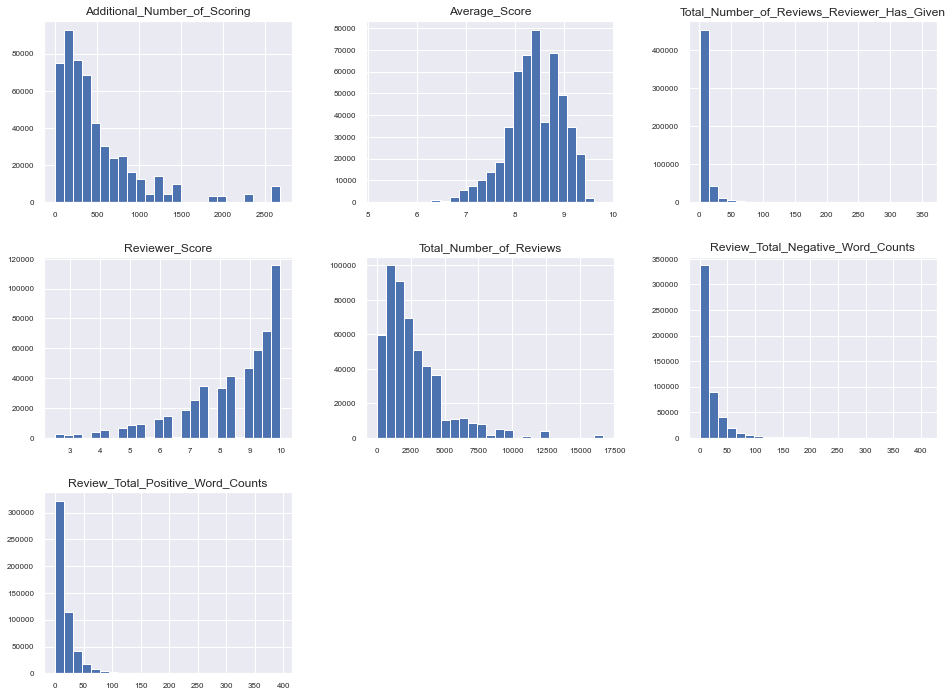

In [64]:
# Set the font size for different plot elements
plt.rcParams.update({
    'font.size': 10,                  # Adjust the overall font size
    'axes.titlesize': 12,             # Title font size
    'axes.labelsize': 10,             # Axis labels font size
    'xtick.labelsize': 8,             # X-axis tick labels font size
    'ytick.labelsize': 8,             # Y-axis tick labels font size
})

# Your code for plotting
df[['Additional_Number_of_Scoring','Average_Score',
    'Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','Total_Number_of_Reviews','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']].hist(bins=25, figsize=(16, 12))

plt.show()


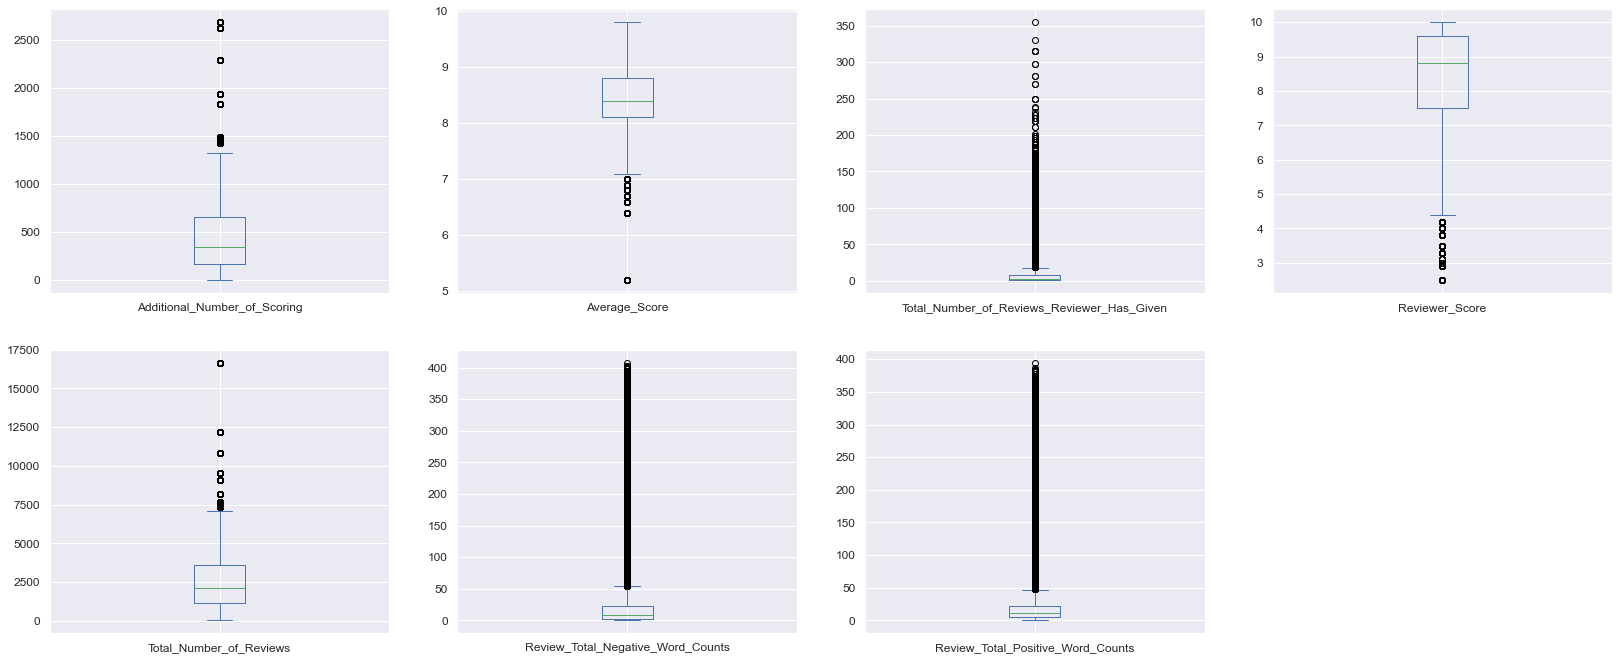

In [65]:
# Set the font size for different plot elements
plt.rcParams.update({
    'font.size': 20,                  # Adjust the overall font size
    'axes.titlesize': 18,             # Title font size
    'axes.labelsize': 14,             # Axis labels font size
    'xtick.labelsize': 12,             # X-axis tick labels font size
    'ytick.labelsize': 12,             # Y-axis tick labels font size
})


df[['Additional_Number_of_Scoring','Average_Score',
    'Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','Total_Number_of_Reviews','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts']].plot(kind = "box" , subplots = True , figsize = (28,24) ,  layout = (4,4))
plt.show()

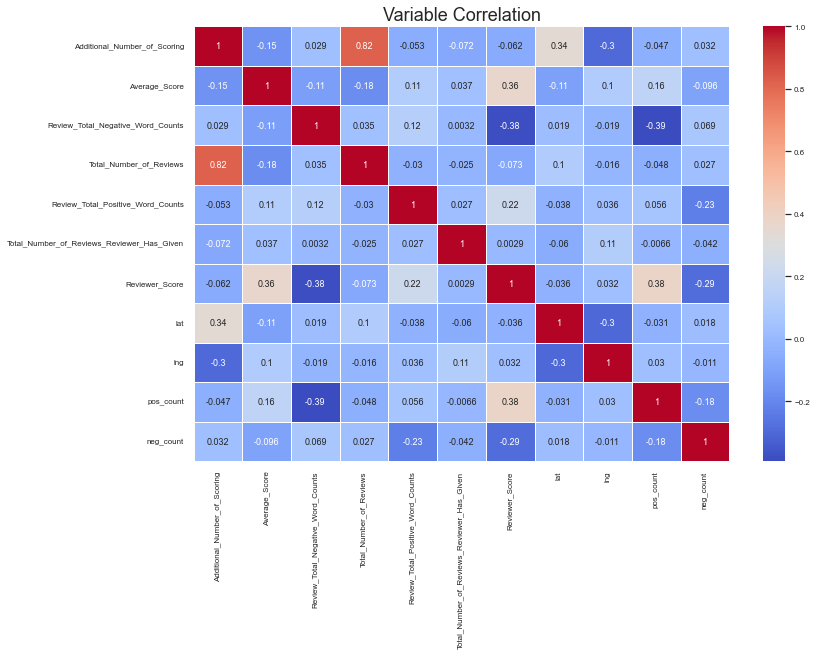

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font size for different plot elements
plt.rcParams.update({
    'font.size': 9,                  # Adjust the overall font size
    'axes.labelsize': 9,             # Axis labels font size
    'xtick.labelsize': 8,            # X-axis tick labels font size
    'ytick.labelsize': 8,            # Y-axis tick labels font size
})

# Your code for plotting
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidth=1, annot=True, annot_kws={"size": 9})

plt.title('Variable Correlation')  # Add the title to the plot

plt.show()


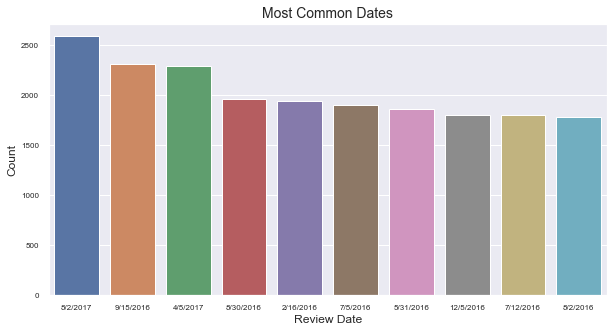

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font size for different plot elements
plt.rcParams.update({
    'font.size': 10,                  # Adjust the overall font size
    'axes.labelsize': 10,             # Axis labels font size
    'xtick.labelsize': 8,             # X-axis tick labels font size
    'ytick.labelsize': 8,             # Y-axis tick labels font size
})

# Your code for plotting
df.Review_Date.value_counts(dropna=False)
dates = df.Review_Date.value_counts()[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=dates.index, y=dates)

plt.title("Most Common Dates", fontdict={"fontsize": 14})
plt.xlabel("Review Date", fontdict={"fontsize": 12})  # Adjust x-axis label font size
plt.ylabel("Count", fontdict={"fontsize": 12})        # Adjust y-axis label font size

plt.show()


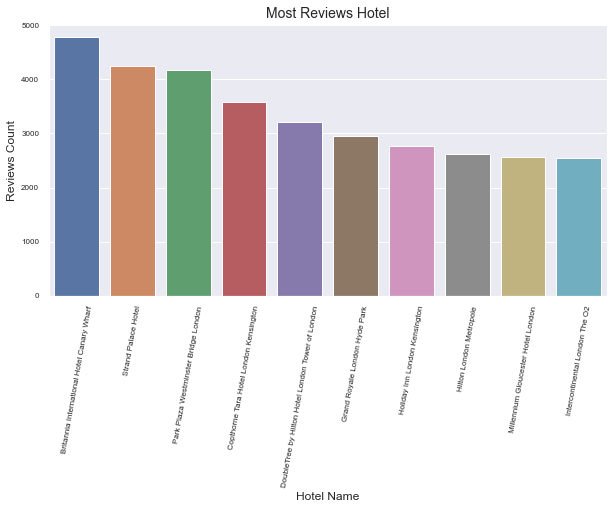

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font size for different plot elements
plt.rcParams.update({
    'font.size': 10,                  # Adjust the overall font size
    'axes.labelsize': 10,             # Axis labels font size
    'xtick.labelsize': 8,             # X-axis tick labels font size
    'ytick.labelsize': 8,             # Y-axis tick labels font size
})

# Your code for plotting
names = df.Hotel_Name.value_counts(dropna=False)[:10]

plt.figure(figsize=(10, 5))
sns.barplot(x=names.index, y=names)

plt.title("Most Reviews Hotel", fontdict={"fontsize": 14})
plt.xlabel("Hotel Name", fontdict={"fontsize": 12})       # Adjust x-axis label font size
plt.ylabel("Reviews Count", fontdict={"fontsize": 12})    # Adjust y-axis label font size
plt.xticks(rotation=80)

plt.show()


In [69]:
# creating a function to find all the numeric columns, and also the non-numeric columns

def find_numeric_and_non_numeric_columns(df):
    numeric_columns = []
    non_numeric_columns = []
    for column in df.columns:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            numeric_columns.append(column)
        else:
            non_numeric_columns.append(column)

    print(f'The numeric columns are: {numeric_columns}')
    print(f'The non-numeric columns are: {non_numeric_columns}')

find_numeric_and_non_numeric_columns(df)

The numeric columns are: ['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat', 'lng', 'pos_count', 'neg_count']
The non-numeric columns are: ['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review']


In [70]:
# lets look at the non-numeric columns
for column in df.columns:
    if df[column].dtype == 'object':
        print(f'The unique values in the {column} column are: {df[column].unique()}')

The unique values in the Hotel_Address column are: [' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands'
 '1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom'
 '1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom'
 ...
 'Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom'
 'Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom'
 'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria']
The unique values in the Review_Date column are: ['8/3/2017' '7/31/2017' '7/24/2017' '7/17/2017' '7/9/2017' '7/8/2017'
 '7/7/2017' '7/6/2017' '7/4/2017' '7/3/2017' '6/30/2017' '6/29/2017'
 '6/20/2017' '6/19/2017' '6/12/2017' '6/10/2017' '5/29/2017' '5/27/2017'
 '5/25/2017' '5/22/2017' '5/21/2017' '5/16/2017' '5/11/2017' '5/9/2017'
 '5/2/2017' '4/27/2017' '4/26/2017' '4/20/2017' '4/19/2017' '4/18/2017'
 '4/16/2017' '4/14/2017' '4/10/2017' '4/5/2017' '3/29/2017' '3/22/2017'
 '3/20/2017' '3/19/20

The unique values in the Negative_Review column are: ['i am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place i made my booking via booking com we stayed for 6 nights in this hotel from 11 to 17 july upon arrival we were placed in a small room on the 2nd floor of the hotel it turned out that this was not the room we booked i had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings the room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it i intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day so i had to check out the next day before 11 o clock in order t

In [71]:
# loading the data to dataframe and saving it into pickle file
text_df = pd.DataFrame()
text_df['Summary'] = summary
text_df['score'] = score
text_df.to_pickle('text_df')

# Model Performance for sentiment analysis

In [72]:
# loading the positive reviews and negative reviews into text.
pos_reviews = df['Positive_Review'].values
pos_reviews = pos_reviews.tolist()
neg_reviews = df['Negative_Review'].values
neg_reviews = neg_reviews.tolist()
text = pos_reviews+neg_reviews

In [73]:
#converting the data into numpy arrays
summary = np.array(text_df.Summary)
score = text_df['score'].values

In [74]:
text_df.columns

Index(['Summary', 'score'], dtype='object')

## Featurizer - Bag of words (Unigram)

## 1. Multinomial Naive Bayes:

In [75]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [76]:
import pickle
start_time = time.time()
best_params = [] #store best parameters for MultinomialNB
parameters = {'alpha':[i for i in range(1,100,10)]} 
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(max_features = i)
    data = vec.fit_transform(summary)
    # Save the CountVectorizer object to a pickle file
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(vec, f)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    data = 0

print("--- %s seconds ---" % (time.time() - start_time))

--- 140.5892674922943 seconds ---


In [77]:
import pickle

# Load the CountVectorizer object from the pickle file
with open('count_vectorizer.pkl', 'rb') as f:
    vec = pickle.load(f)

print(vec)  # Check the loaded object


CountVectorizer(max_features=13000)


In [78]:
##Confusion matrix
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, false negative, true positive
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN # Total num of examples

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

Confusion matrix:
 [[140915  13778]
 [  9455 144980]]


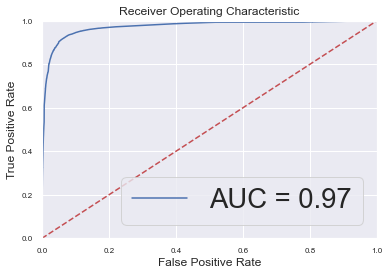

The log loss for the Naive bayes is: 0.2663865943835242


C:\Users\KISHOR~1\AppData\Local\Temp/ipykernel_14272/4039879880.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(class_labels + [''],rotation=90)


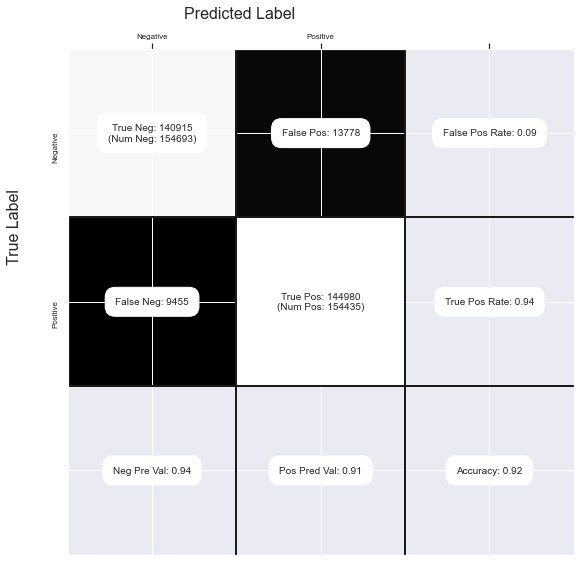

Precision : 91.32138222955693
Recall : 93.87768316767573
The accuracy is 92.48 %
------------ 1.9910125732421875 seconds ------------


In [79]:
start_time = time.time()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
# Decrease the size of the figure
plt.figure(figsize=(6, 4))
plt.title('Receiver Operating Characteristic', fontsize=12)  # Adjust title font size
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=12)   # Adjust y-axis label font size
plt.xlabel('False Positive Rate', fontsize=12)  # Adjust x-axis label font size
plt.show()


#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))
print('------------ %s seconds ------------'%(time.time()-start_time))

## Logistic Regression

In [80]:
#Logistic regression hyperparameter tuning
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
start_time = time.time()
best_params_logreg = []
parameters = {'loss' :['log'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
warnings.filterwarnings('ignore')
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_logreg.append(clf.best_params_)
print('Best parameters for Logistic Regression are:',best_params_logreg)
print("--- %s seconds ---" % (time.time() - start_time))

Best parameters for Logistic Regression are: [{'alpha': 0.1, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l2'}]
--- 249.502867937088 seconds ---


In [81]:
# Save the trained model to a pickle file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Save the CountVectorizer object to a pickle file
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(vec, f)

Confusion matrix:
 [[133975  20718]
 [ 18530 135905]]


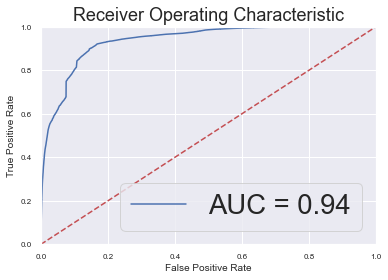

The log loss for the Logistic regression is: 0.5523948641809692


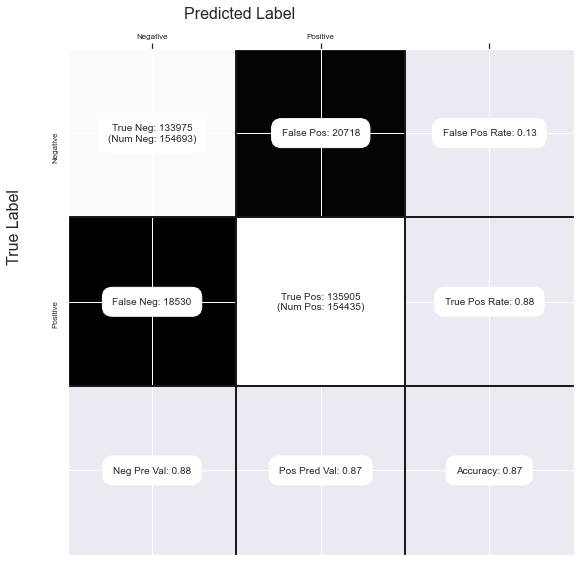

Precision : 86.7720577437541
Recall : 88.00142454754427
The accuracy is 87.3 %


In [82]:
clf = SGDClassifier(loss = 'log',penalty = 'l2',alpha = 0.1, n_jobs = -1)
#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_log_ref = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n",conf_log_ref)
#ROC for a given hyperparameters for logistic regression
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Logistic regression is:",a)

#print confusion matrix
show_confusion_matrix(conf_log_ref,['Negative','Positive'])

#Precision and recall
tn = conf_log_ref[0,0]; fp = conf_log_ref[0,1]; fn = conf_log_ref[1,0]; tp = conf_log_ref[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_log_ref[0][0]
tn = conf_log_ref[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

#### Predicting and testing with new data for  Multinomial Naive Bayes

In [83]:
import pickle
from sklearn.naive_bayes import MultinomialNB

# Assuming you have trained a Multinomial Naive Bayes model named 'multinomial_nb_model'
# Save the trained model to a pickle file
with open('multinomial_nb_model.pkl', 'wb') as f:
    pickle.dump(clf, f)



In [84]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Load the CountVectorizer object from the pickle file
with open('count_vectorizer.pkl', 'rb') as f:
    vec = pickle.load(f)

# Preprocess the new data (replace 'new_data' with your new data)
new_data = "The hotel was very worst the room was not clean"
new_data_features = vec.transform([new_data])

# Now you can load your trained model (e.g., MultinomialNB) from its pickle file (if you haven't done it yet)
# And use it to predict the sentiment of the new data
# For example, assuming you have saved your MultinomialNB model as 'multinomial_nb_model.pkl':

with open('multinomial_nb_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict the sentiment using the loaded model
predicted_sentiment = model.predict(new_data_features)

# Print the predicted sentiment (or take appropriate actions based on the prediction)
if predicted_sentiment == 1:
    print("Positive Review")
elif predicted_sentiment == 0:
    print("Negative Review")
else:
    print("Neutral Review")


Positive Review


#### Predicting and testing with new data for logistic regression

In [85]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Load the CountVectorizer object from the pickle file
with open('count_vectorizer.pkl', 'rb') as f:
    vec = pickle.load(f)

# Preprocess the new data (replace 'new_data' with your new data)
new_data = "  No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam  "
new_data_features = vec.transform([new_data])

# Now you can load your trained model (e.g., LogisticRegression) from its pickle file (if you haven't done it yet)
# And use it to predict the sentiment of the new data
# For example, assuming you have saved your LogisticRegression model as 'logistic_regression_model.pkl':

with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict the sentiment using the loaded model
predicted_sentiment = model.predict(new_data_features)

# Print the predicted sentiment (or take appropriate actions based on the prediction)
if predicted_sentiment == 1:
    print("Positive Review")
elif predicted_sentiment == 0:
    print("Negative Review")
else:
    print("Neutral Review")


Positive Review


#### Support Vector Machine with linear kernel

In [86]:
#SVM hyperparameter tuning
start_time = time.time()
best_params_SVM = []
parameters = {'loss' :['hinge'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],'n_jobs':[-1]}
 
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters,cv=5)
clf.fit(x_train, y_train)
best_params_SVM = clf.best_params_
print("Best hyperparameters for linear SVM:",best_params_SVM)
print('------{} seconds-------'.format(time.time()-start_time))

Best hyperparameters for linear SVM: {'alpha': 0.1, 'loss': 'hinge', 'n_jobs': -1, 'penalty': 'l2'}
------514.4778549671173 seconds-------


Confusion matrix:
 [[140860  13833]
 [ 25926 128509]]


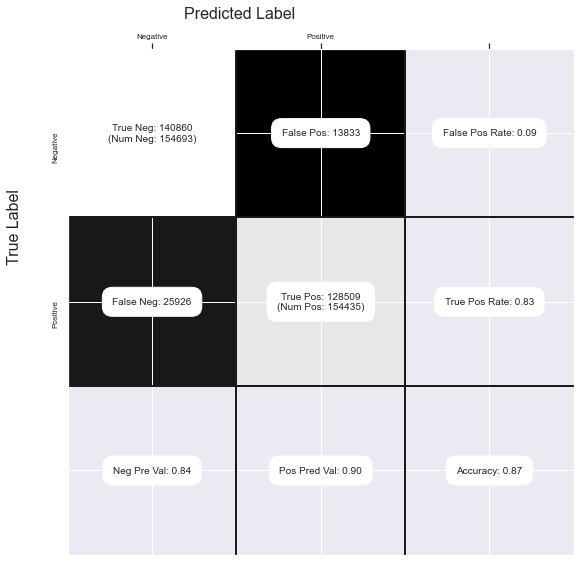

Precision : 90.28185637408495
Recall : 83.21235471233852
The accuracy is 87.14 %


In [87]:
#Linear SVM
clf = SGDClassifier(penalty = 'l2', alpha = 0.1, n_jobs =  -1, loss = 'hinge')
#choose acc to best parameters
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_SVM_ref = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",conf_SVM_ref)
#print confusion matrix
show_confusion_matrix(conf_SVM_ref,['Negative','Positive'])
#Precision and recall
tn = conf_SVM_ref[0,0]; fp = conf_SVM_ref[0,1]; fn = conf_SVM_ref[1,0]; tp = conf_SVM_ref[1,1];
precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)
print("Precision :",precision)
print("Recall :",recall)
tp = conf_SVM_ref[0][0]
tn = conf_SVM_ref[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

#### BOW Bi-gram :MultinomialNB

#### since MultinomialNB is giving better accuracy i'm doing only this model for Bi-grams¶

In [88]:
# Hyperparameter tuning for MultinomialNB with Bigrams
start_time = time.time()
best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
features = [i for i in range(10000,130000,10000)]
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = CountVectorizer(ngram_range=(1,2),max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0
print('-------- %s seconds -------'%(time.time()-start_time))

-------- 794.7163321971893 seconds -------


Confusion matrix:
 [[143243  11450]
 [ 10369 144066]]


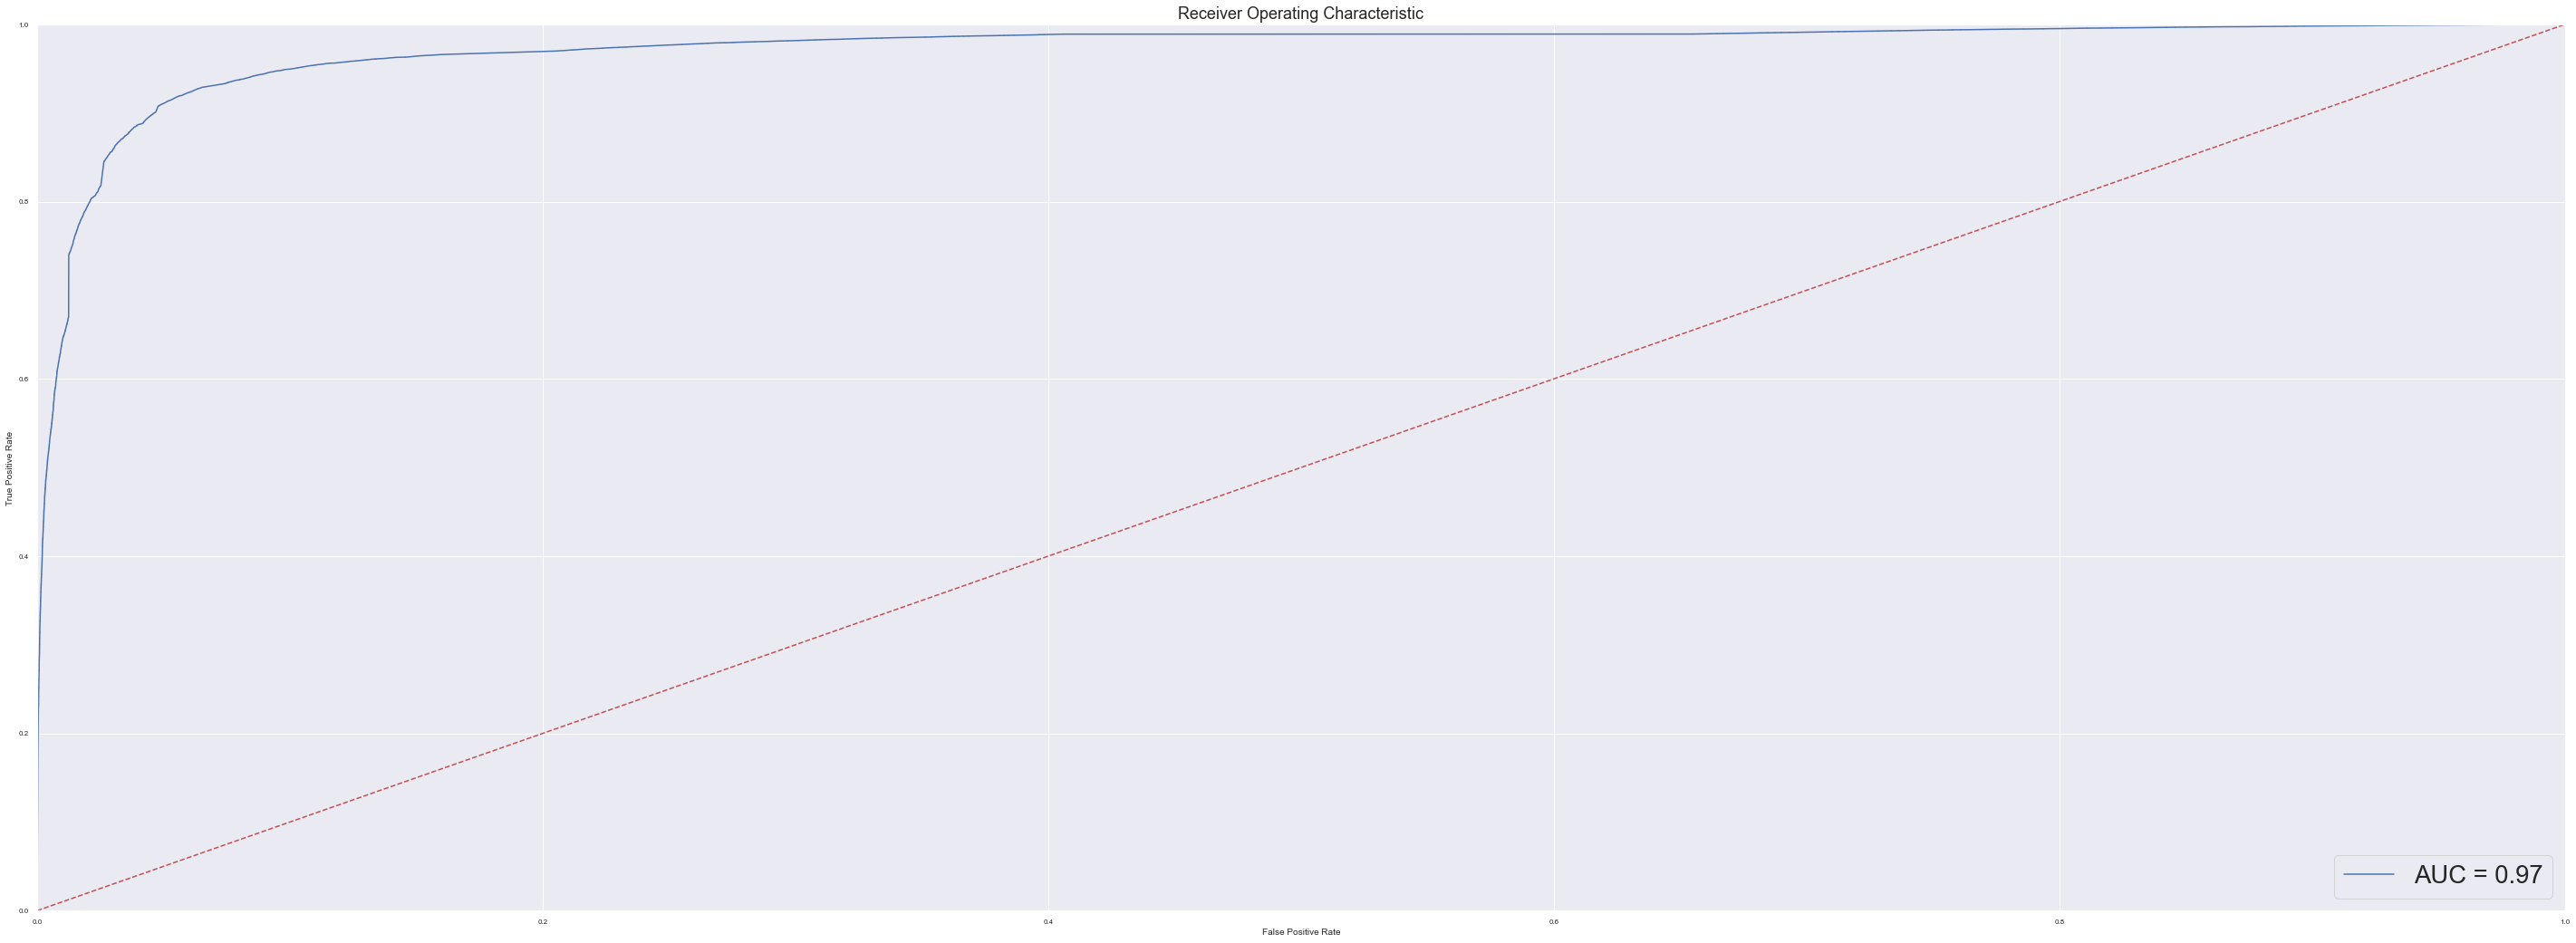

The log loss for the Naive bayes is: 0.3279700928655696


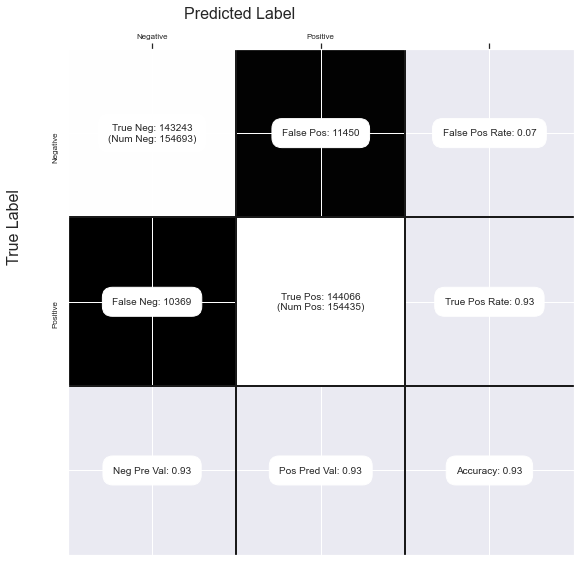

Precision : 92.63741351372207
Recall : 93.28584841519086
The accuracy is 92.94 %


In [89]:
# MultinomialNb with Bigrams
score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))

#### TF-IDF: Multinomial Naive Bayes

In [90]:
# Hyperparameter tuning for MultinomialNB with Bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
start_time = time.time()
best_params = []
parameters = {'alpha':[i for i in range(1,100,10)]}
acc = []
score = list(score)
for i in range(2000,14000,1000):
    vec = TfidfVectorizer(max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters,cv=5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size=0.3, random_state=42)
    clf.fit(x_train, y_train)
    acc.append(100.0*sum(clf.predict(x_test))/len((clf.predict(x_test))))
    best_params.append(clf.best_params_)
    vec = 0
    data = 0
print('-------- %s seconds -------'%(time.time()-start_time))

-------- 406.2687509059906 seconds -------


Confusion matrix:
 [[140884  13809]
 [  9570 144865]]


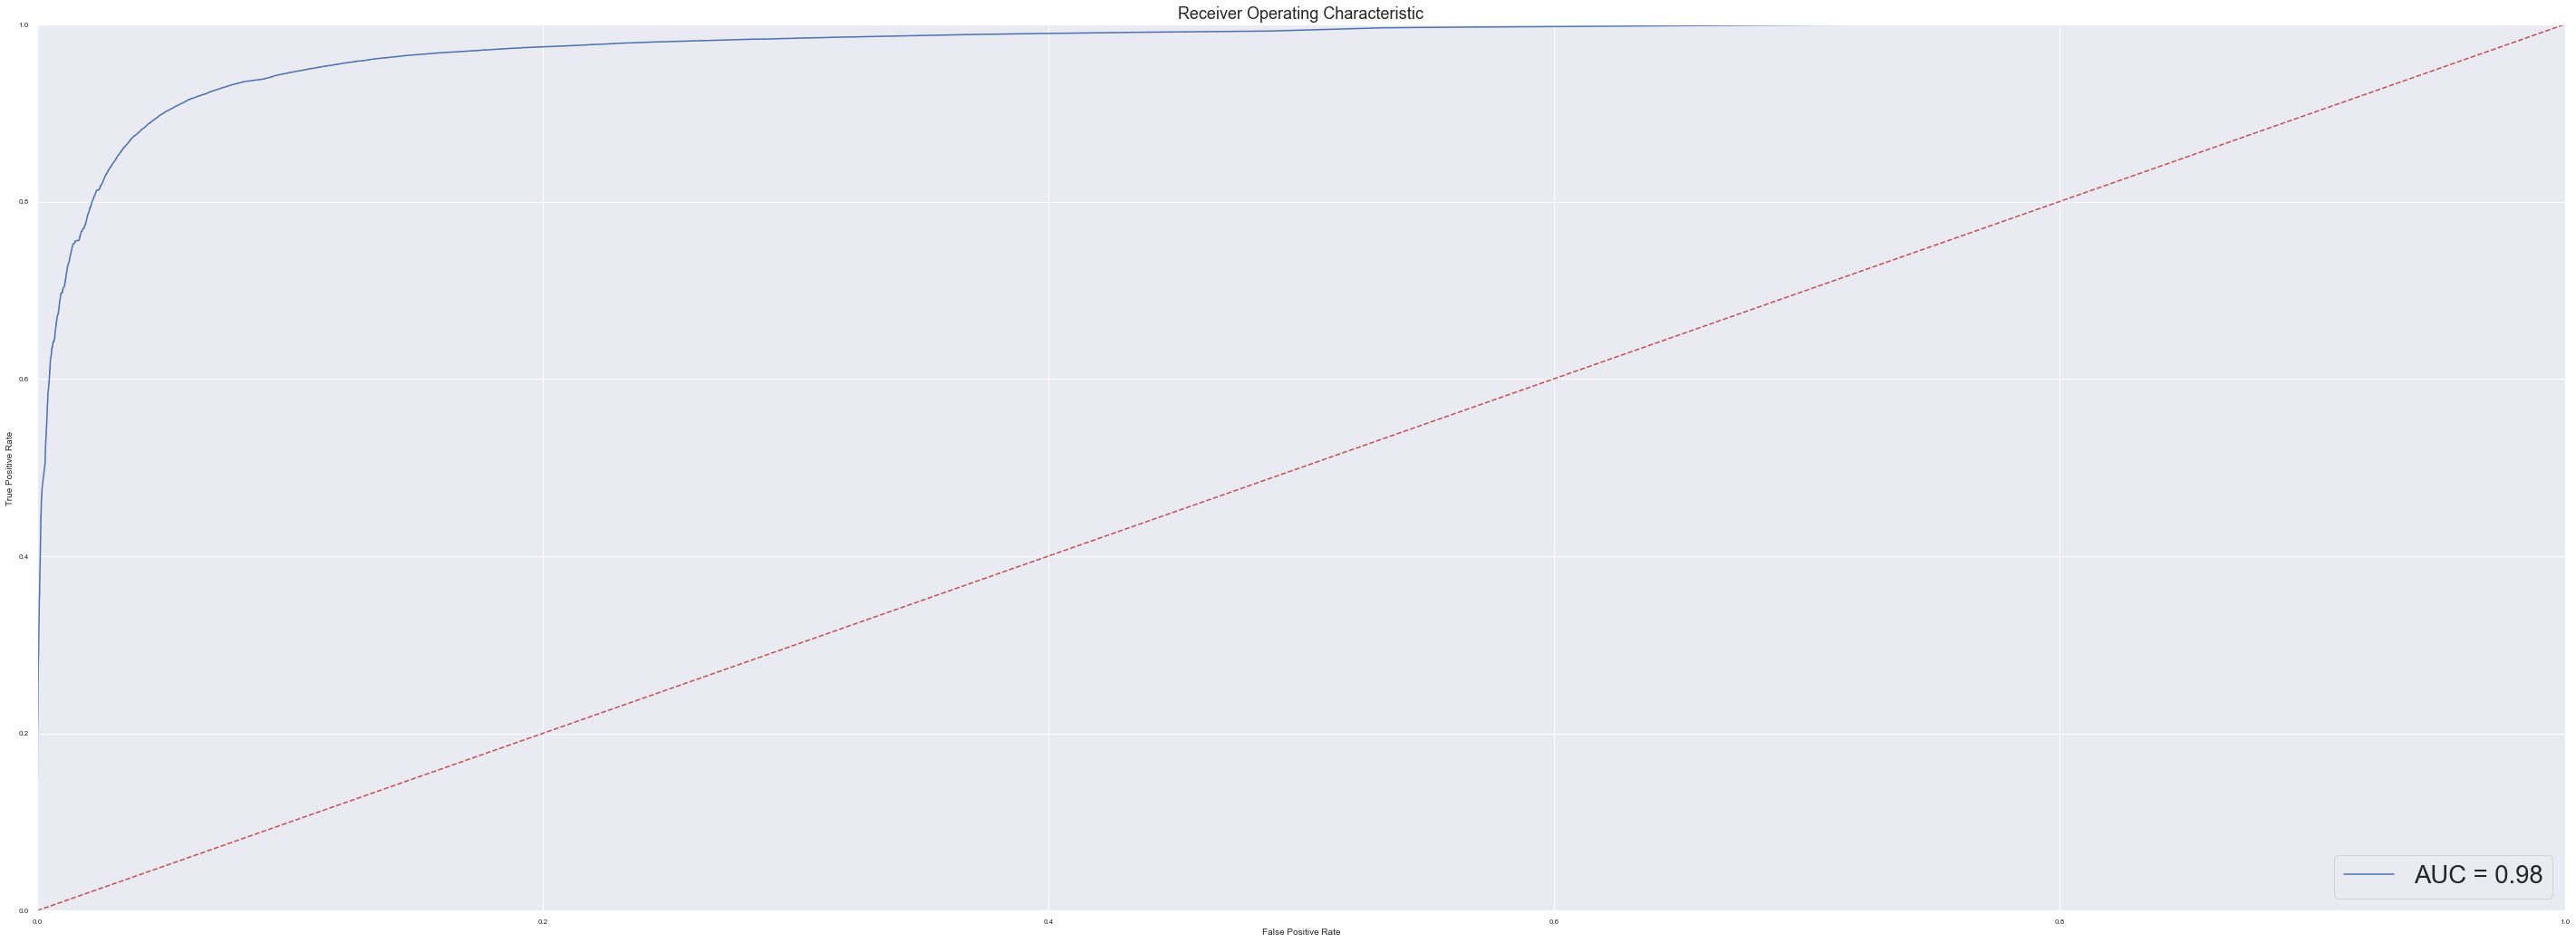

The log loss for the Naive bayes is: 0.205144275679825


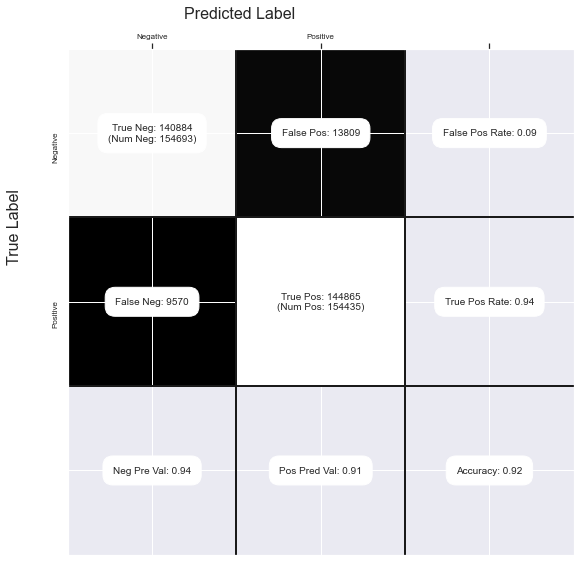

Precision : 91.29725096739226
Recall : 93.80321818240684
The accuracy is 92.44 %


In [91]:
# MultinomialNb with TF-IDF
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

score_Log_reg = []
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)    

print("Confusion matrix:\n",conf_NB)

#ROC for a given alpha for NB
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#Plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#print the log loss
a = log_loss(y_test, probs)
print("The log loss for the Naive bayes is:",a)

#print confusion matrix
show_confusion_matrix(conf_NB,['Negative','Positive'])

#Precision and recall
tn = conf_NB[0,0]; fp = conf_NB[0,1]; fn = conf_NB[1,0]; tp = conf_NB[1,1];

precision = 100*float(tp)/(tp+fp)
recall = 100*float(tp)/(tp+fn)

print("Precision :",precision)
print("Recall :",recall)

tp = conf_NB[0][0]
tn = conf_NB[1][1]
print("The accuracy is {} %".format(round(100.0*(tp+tn)/len(y_test),2)))